# Analyzing the social security reform with reinforced learning

This notebook shows how a change in the lowest retirement age influences employment rate.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
!pip install -q git+https://github.com/ajtanskanen/benefits.git  
!pip install -q git+https://github.com/ajtanskanen/econogym.git
!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

!pip install tensorflow==1.15
!pip install stable-baselines==2.10
!pip install bayesian_optimization
!pip install numpy_financial
  
# restart kernel after running pip's

ERROR: Command errored out with exit status 1: git clone -q https://github.com/ajtanskanen/benefits.git /private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-req-build-t7irivt9 Check the logs for full command output.
ERROR: Command errored out with exit status 1: git clone -q https://github.com/ajtanskanen/econogym.git /private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-req-build-ho0ubz9i Check the logs for full command output.
ERROR: Command errored out with exit status 1: git clone -q https://github.com/ajtanskanen/lifecycle-rl.git /private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-req-build-wru48eaj Check the logs for full command output.
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1)
ERROR: No matching distribution found for tensorflow==1.15
  Using cache

  copying atari_py/ale_interface/src/emucore/rsynth/config.h -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/darray.c -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/darray.h -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/elements.c -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/holmes.c -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/kmap -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_interface/src/emucore/rsynth/module.mk -> build/lib.macosx-10.9-x86_64-3.8/atari_py/ale_interface/src/emucore/rsynth
  copying atari_py/ale_inter

Failed to build atari-py
    Running setup.py install for atari-py ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/antti/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-install-m3opu8t4/atari-py/setup.py'"'"'; __file__='"'"'/private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-install-m3opu8t4/atari-py/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-record-i88a94nj/install-record.txt --single-version-externally-managed --compile --install-headers /Users/antti/opt/anaconda3/include/python3.8/atari-py
         cwd: /private/var/folders/yr/h6z0lcjs4mn05xk6f8cbkjbh0000gn/T/pip-install-m3opu8t4/atari-py/
    Complete output (504 lines):
    running inst

    copying atari_py/atari_roms/freeway.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/frostbite.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/gopher.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/gravitar.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/hero.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/ice_hockey.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/jamesbond.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/journey_escape.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/kaboom.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/atari_roms
    copying atari_py/atari_roms/kangaroo.bin -> build/lib.macosx-10.9-x86_64-3.8/atari_py/

  Using cached numpy_financial-1.0.0-py3-none-any.whl (14 kB)


Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
pop_size=10_000 # size of the population to be simulated
#pop_size=1_000 # For Colab
size=10_000_000 # number of timesteps in phase 1 training (callback not used)
#size=100_000 # For Colab demonstration
batch=8 # size of minibatch in phase 1 as number of episodes
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
rlmodel='leaky_acktr' # use ACKTR algorithm with leaky ReLU
year=2018

# Baseline

The baseline model for Finnish social security

In [4]:
baseline_model='baseline_model'
baseline_results='results/baseline_results'
baseline_start='v3_malli_baseline3test_nomort'
baseline_LCmodel=Lifecycle(env='unemployment-v3',include_ove=False,unemp_limit_reemp=True)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False
sigma_reduction True
plotdebug False
additional_tyel_premium 0.0
scale_tyel_accrual False
include_ove False
unemp_limit_reemp True

version 3


In [5]:
baseline_LCmodel.run_results(steps1=size,pop=pop_size,rlmodel=rlmodel,
                train=True,predict=True,cont=True,batch1=batch,log_interval=1000,
                save=baseline_model,start_from=baseline_start,results=baseline_results)

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...






---------------------------------
| explained_variance | 0.999    |
| fps                | 237      |
| nupdates           | 1        |
| policy_entropy     | 1.38     |
| policy_loss        | -0.0114  |
| total_timesteps    | 1680     |
| value_loss         | 0.00843  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1206     |
| nupdates           | 1000     |
| policy_entropy     | 1.35     |
| policy_loss        | 0.019    |
| total_timesteps    | 1680000  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.

Population:   0%|          | 0/10000 [00:00<?, ? p/s]

n_pop 10000
Ave reward 229.09247786945892
Rahavirrat skaalattuna väestötasolle
+-----------------------+----------------------+----------------------+----------------------+
|                       |                  e/v |              toteuma |                  ero |
|-----------------------+----------------------+----------------------+----------------------|
| tyotulosumma          | 90,414,005,554.47    | 89,134,200,000.00    |  1,279,805,554.47    |
| etuusmeno             | 43,245,145,912.19    | 39,279,916,450.00    |  3,965,229,462.19    |
| verot+maksut          | 34,293,834,511.50    | 34,025,549,800.00    |    268,284,711.50    |
| muut tulot            |  8,951,311,400.69    |  5,254,366,650.00    |  3,696,944,750.69    |
| valtionvero           |  4,065,455,200.62    |  5,542,000,000.00    | -1,476,544,799.38    |
| kunnallisvero         | 20,133,333,656.76    | 18,991,000,000.00    |  1,142,333,656.76    |
| ptel                  |  6,113,504,927.58    |  5,560,000,000.00

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


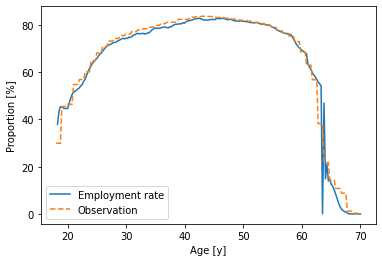

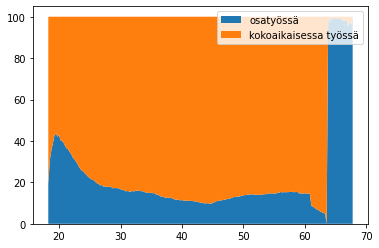

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


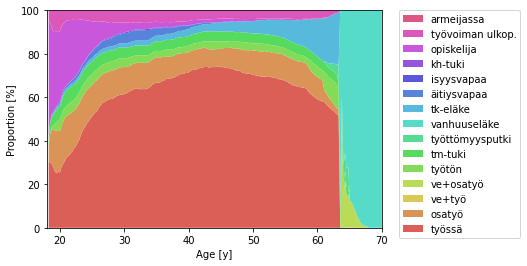

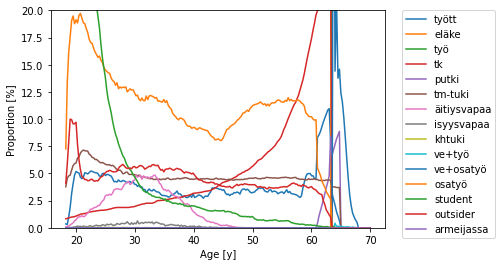

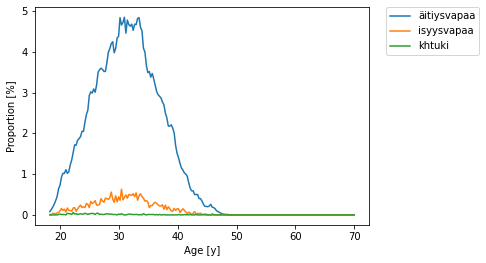

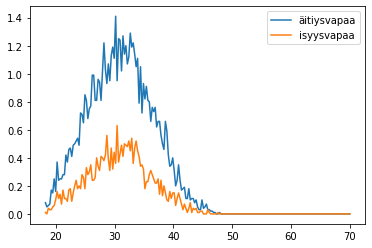

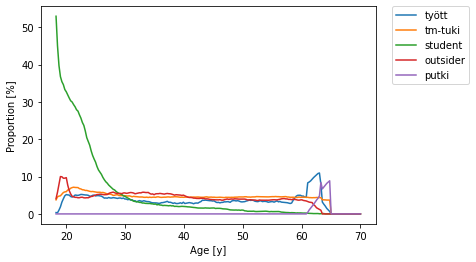

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


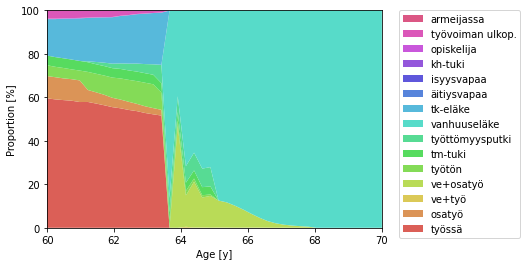

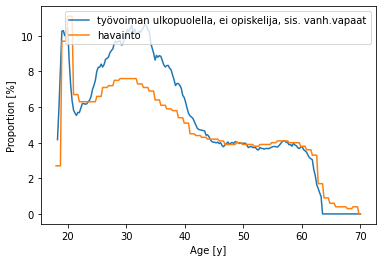

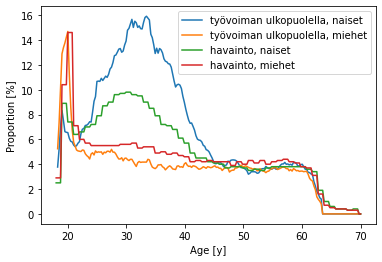

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.52 |      0.33 |       0.14 |      0.00 |        0.00 |
| 30-39 |     0.45 |      0.37 |       0.18 |      0.00 |        0.00 |
| 40-49 |     0.45 |      0.38 |       0.17 |      0.00 |        0.00 |
| 50-59 |     0.42 |      0.37 |       0.20 |      0.00 |        0.00 |
| 60-65 |     0.20 |      0.16 |       0.15 |      0.14 |        0.35 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.77 |     

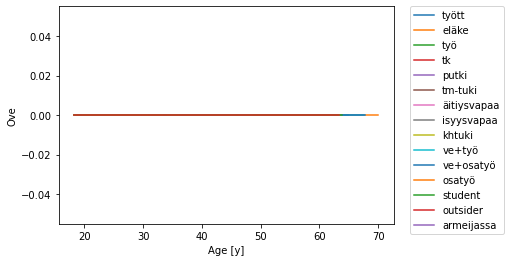

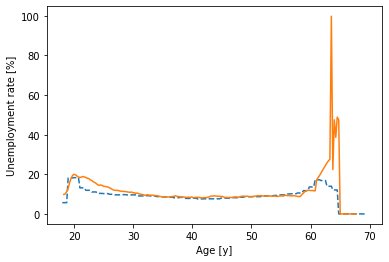

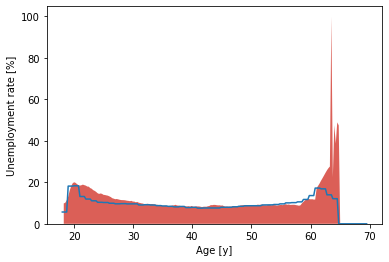

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


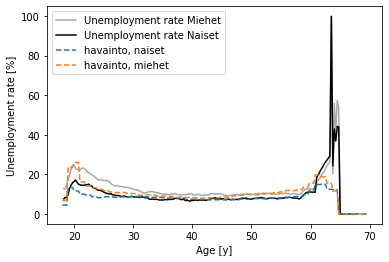

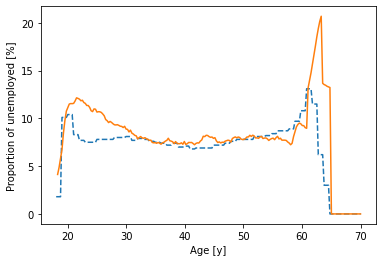

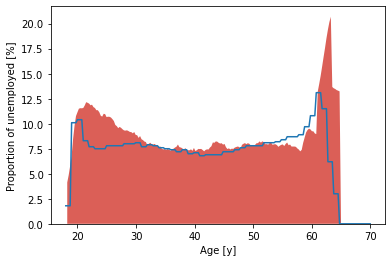

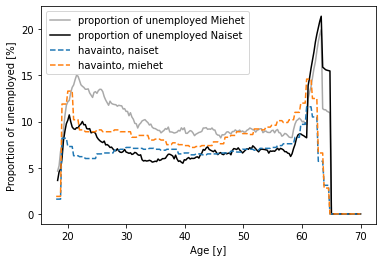

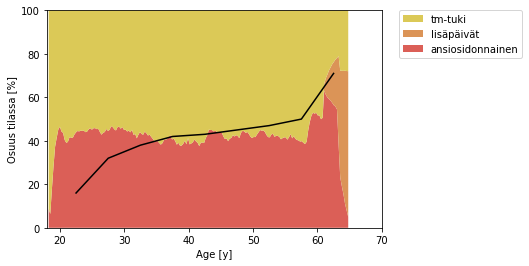

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


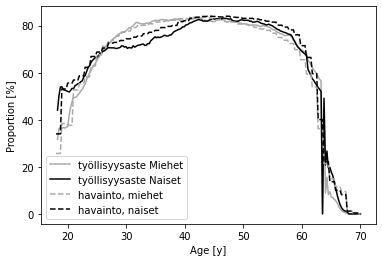

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


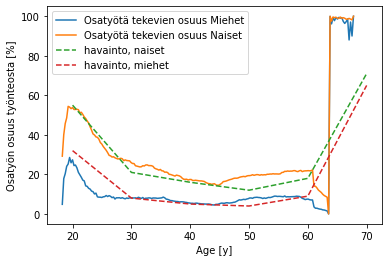

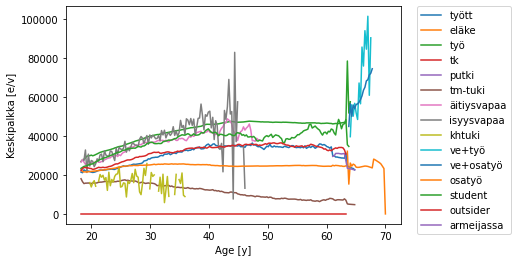

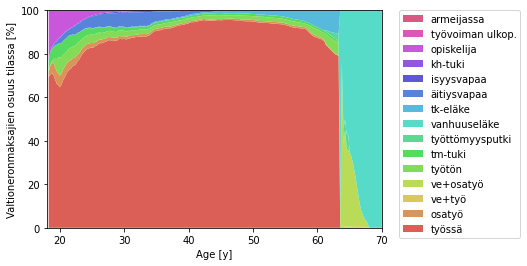

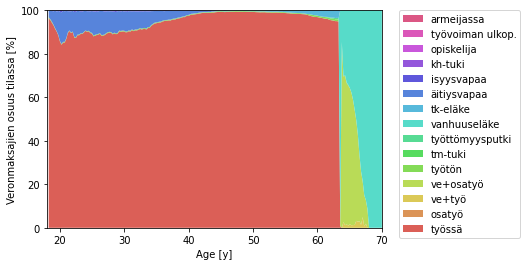

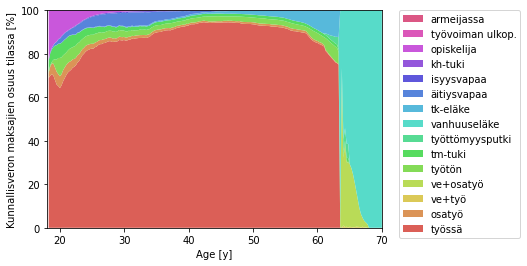

Valtionveron maksajien osuus
Etuudella olevat 4.74
Työssä 85.20
Eläkkeellä 12.64

Kunnallisveron maksajien osuus
Etuudella olevat 7.17
Työssä 68.55
Eläkkeellä 25.63

Veronmaksajien osuus
Etuudella olevat 6.76
Työssä 71.36
Eläkkeellä 23.44



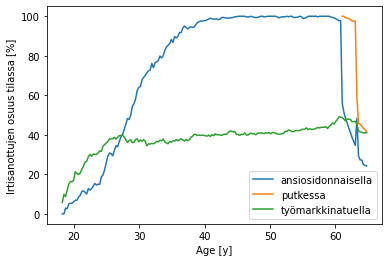

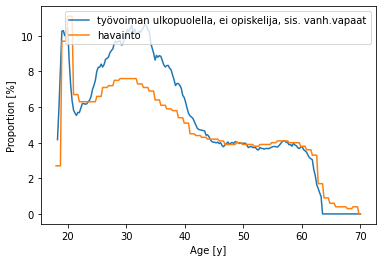

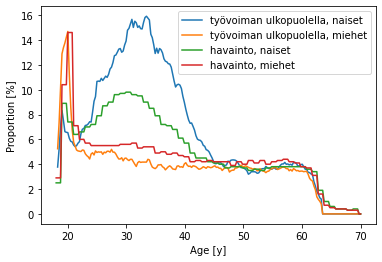

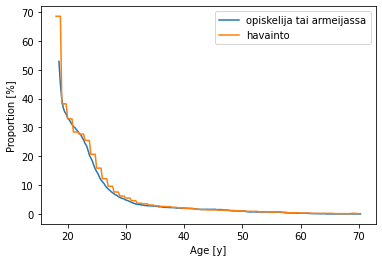

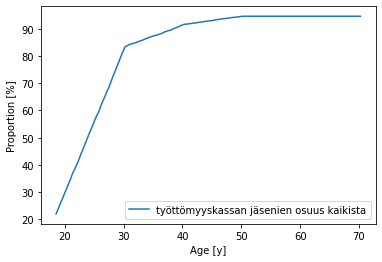

Kassanjäseniä min 21.99 % max 94.62 %


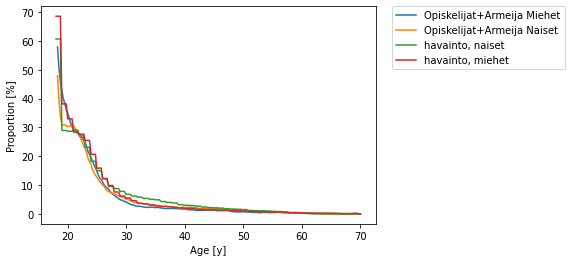

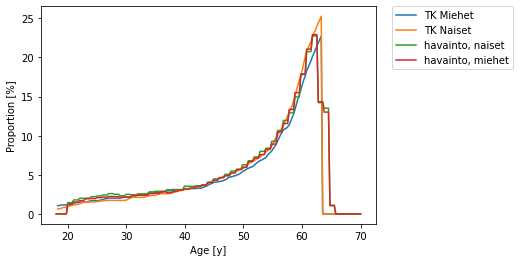

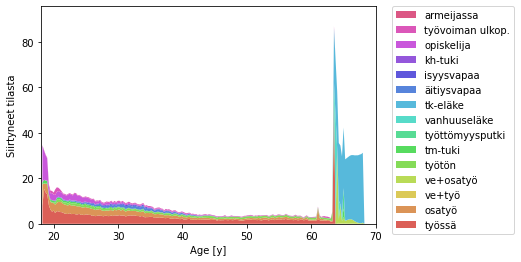

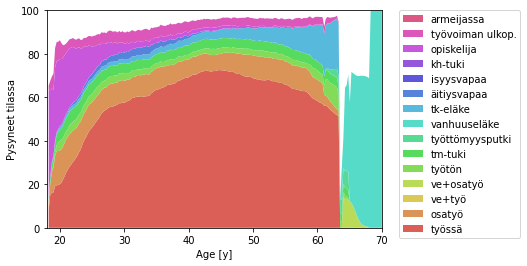

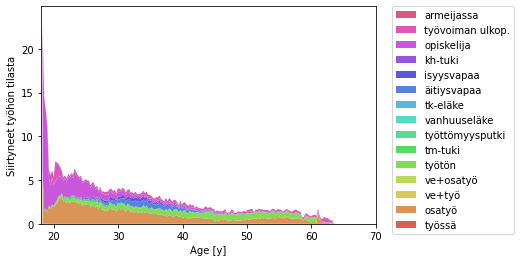

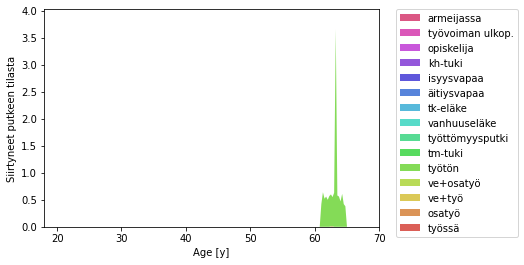

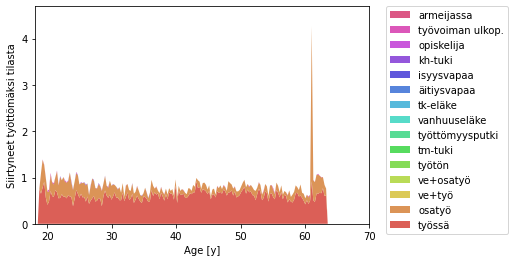

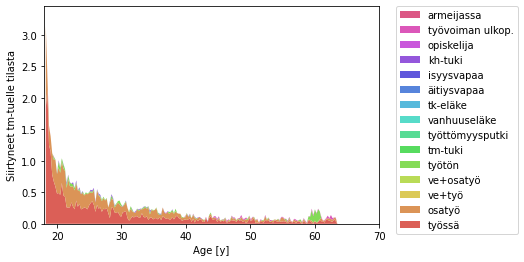

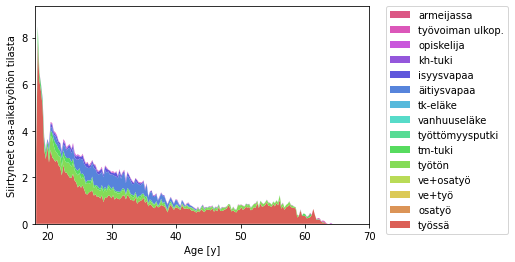

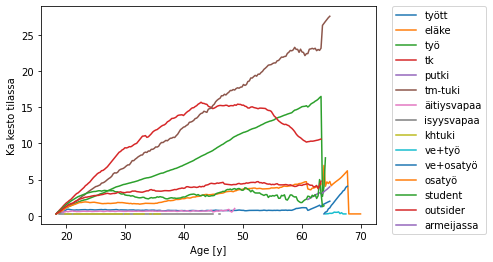

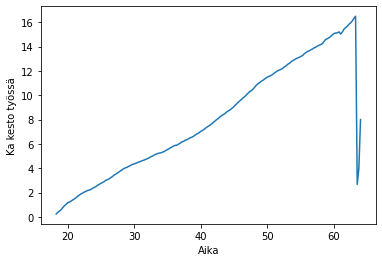

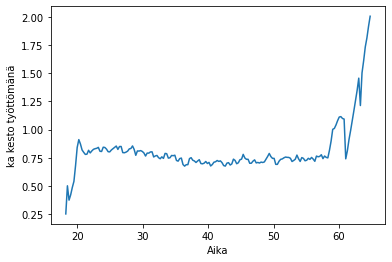

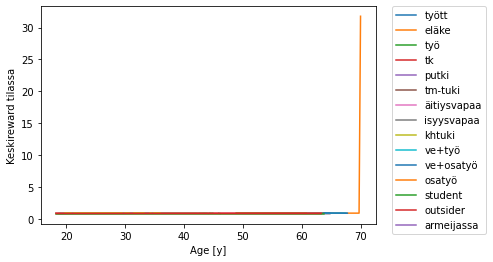

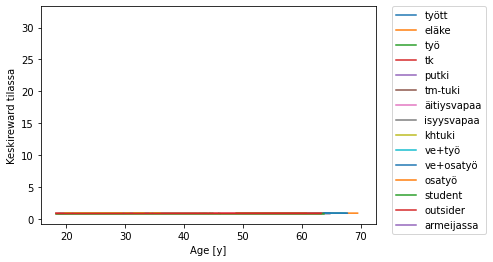

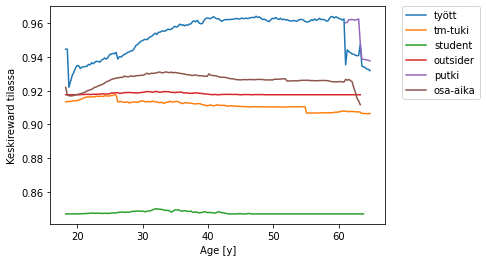

No handles with labels found to put in legend.


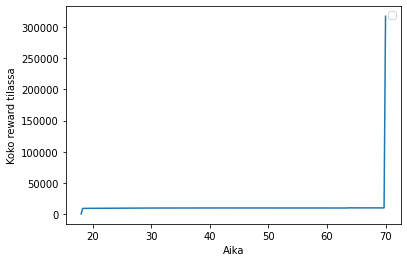

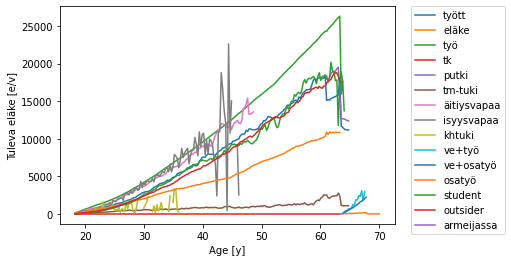

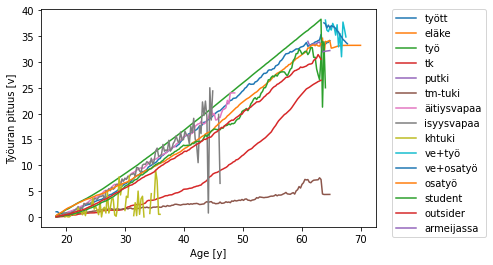

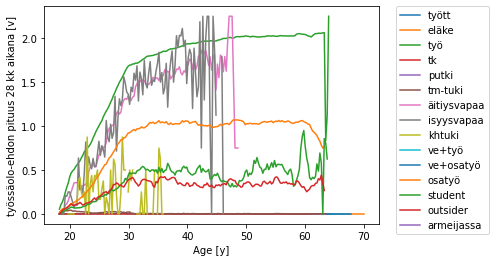

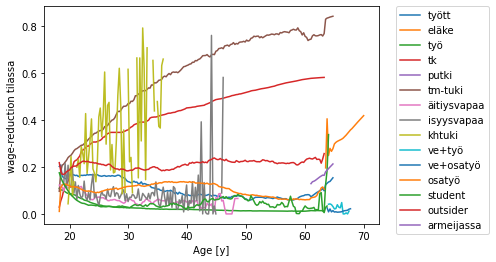

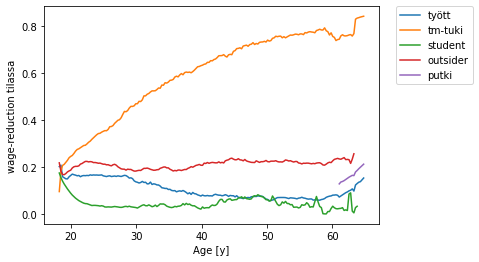

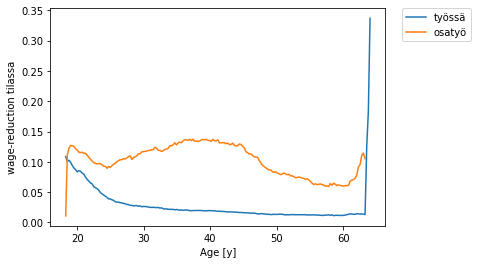

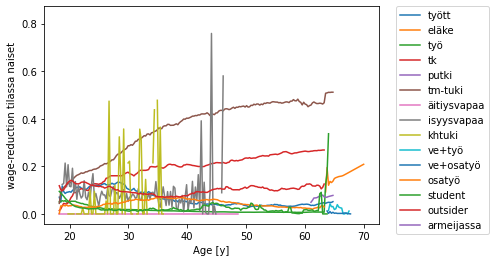

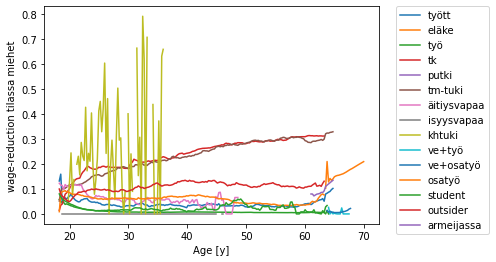

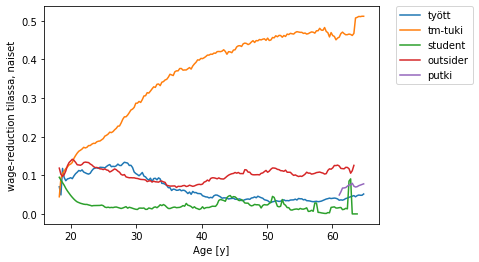

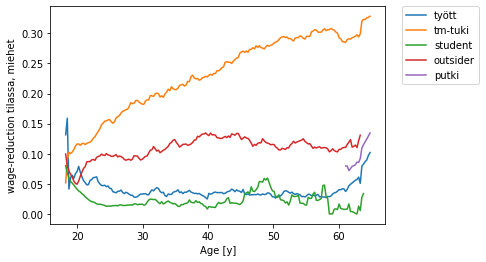

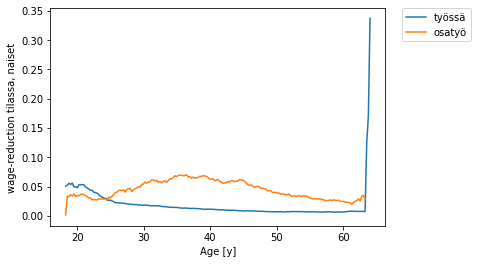

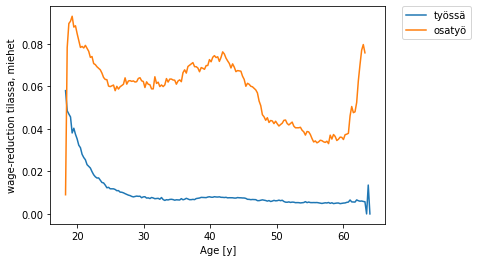

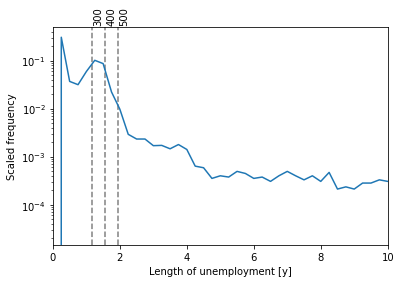

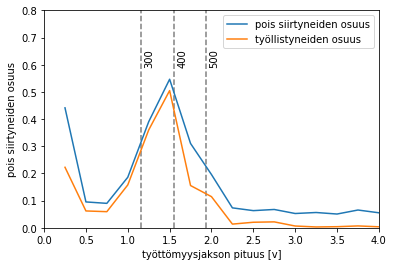

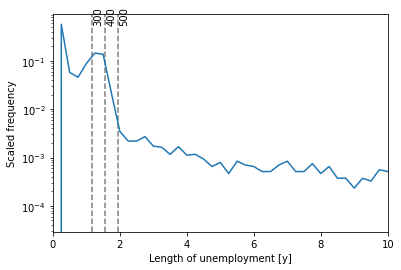

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


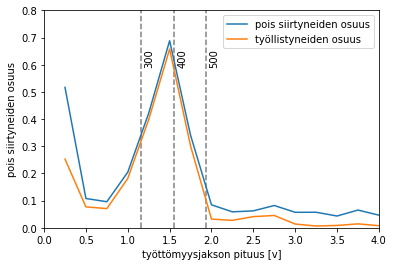

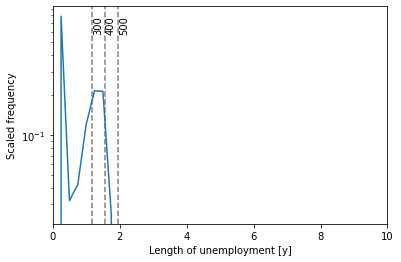

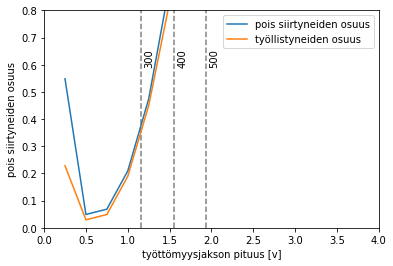

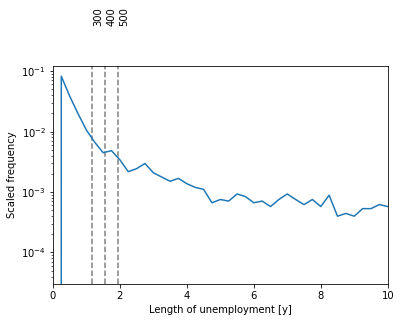

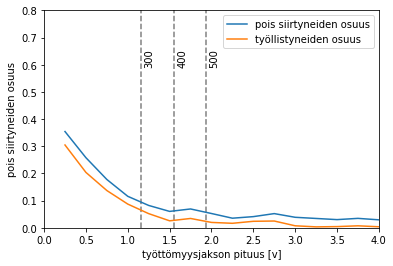

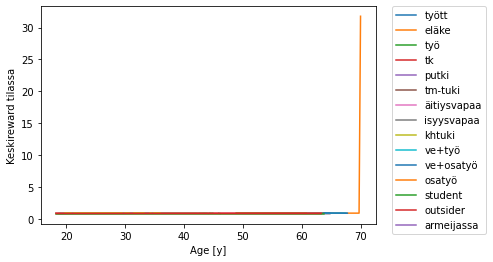

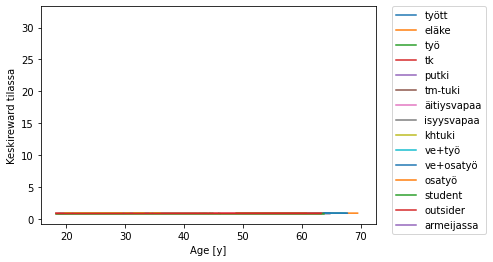

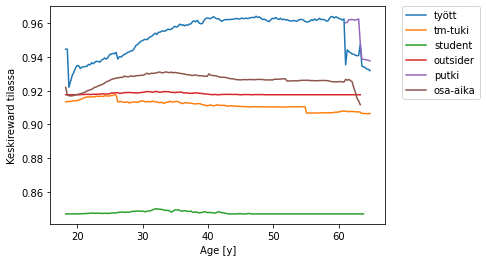

No handles with labels found to put in legend.


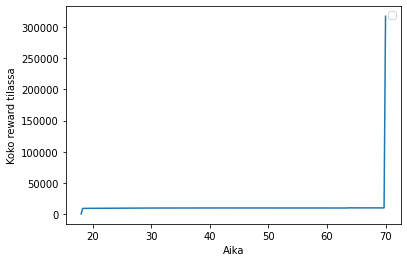

In [6]:
baseline_LCmodel.render(load=baseline_results,figname='v3_')

# Increasing the retirement age

Above the retirement age was 63.5 years. Here we increase it to 65 years.

In [7]:
retirement_model='retirement_LCmodel'
retirement_results='results/retirement_results'

Now, set up the Lifecycle model with a higher lowest retirement age

In [8]:
ret_LC=Lifecycle(env='unemployment-v3',min_retirementage=65,include_ove=False,unemp_limit_reemp=True)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 65
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False
sigma_reduction True
plotdebug False
additional_tyel_premium 0.0
scale_tyel_accrual False
include_ove False
unemp_limit_reemp True

version 3


And then run the simulation.

In [9]:
ret_LC.run_results(steps1=size,pop=pop_size,rlmodel=rlmodel,
                train=True,predict=True,cont=True,batch1=batch,log_interval=1000,
                save=retirement_model,start_from=baseline_model,results=retirement_results)

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8
training...
---------------------------------
| explained_variance | 0.993    |
| fps                | 226      |
| nupdates           | 1        |
| policy_entropy     | 1.35     |
| policy_loss        | -0.183   |
| total_timesteps    | 1680     |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 1137     |
| nupdates           | 1000     |
| policy_entropy     | 1.34     |
| policy_loss        | -0.0183  |
| total_timesteps    | 1680000  |
| value_loss         | 0.0247   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1141     |
| nupdates           | 2000     |
| policy_entropy     | 1.37     |
| policy_loss        | 0.00536  |
| total_timesteps    | 3360000  |
| value_loss         | 0.0144   |
---------------------------------
--

Population:   0%|          | 0/10000 [00:00<?, ? p/s]

render method shows the results.

n_pop 10000
Ave reward 228.99550597767308
Rahavirrat skaalattuna väestötasolle
+-----------------------+-----------------------+----------------------+----------------------+
|                       |                   e/v |              toteuma |                  ero |
|-----------------------+-----------------------+----------------------+----------------------|
| tyotulosumma          |  92,698,781,694.83    | 89,134,200,000.00    |  3,564,581,694.83    |
| etuusmeno             |  42,501,434,892.63    | 39,279,916,450.00    |  3,221,518,442.63    |
| verot+maksut          |  34,740,236,251.58    | 34,025,549,800.00    |    714,686,451.58    |
| muut tulot            |   7,761,198,641.06    |  5,254,366,650.00    |  2,506,831,991.06    |
| valtionvero           |   4,079,595,055.12    |  5,542,000,000.00    | -1,462,404,944.88    |
| kunnallisvero         |  20,356,263,792.71    | 18,991,000,000.00    |  1,365,263,792.71    |
| ptel                  |   6,255,505,076.58    |  5,560,

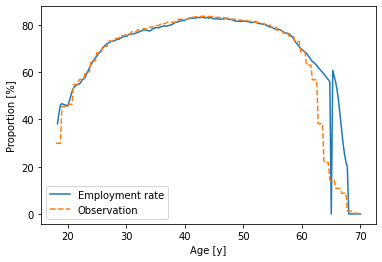

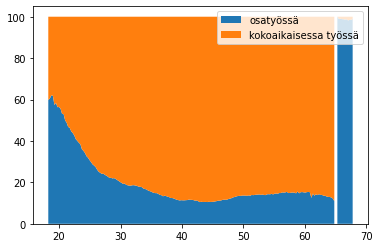

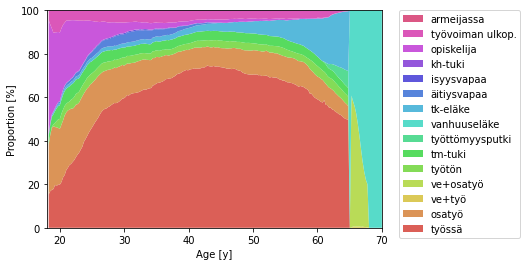

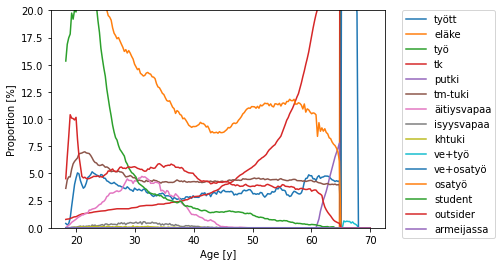

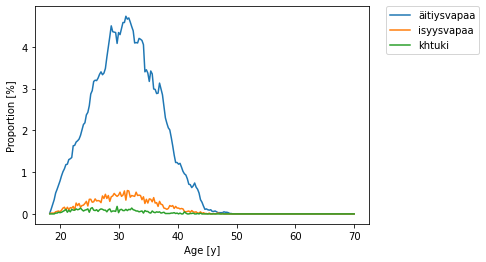

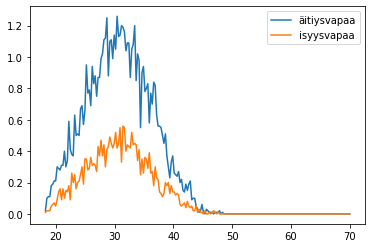

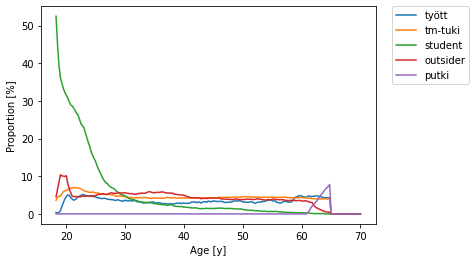

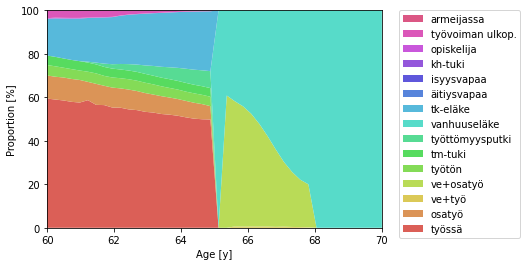

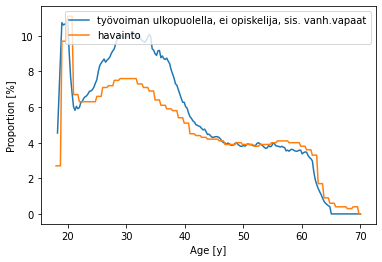

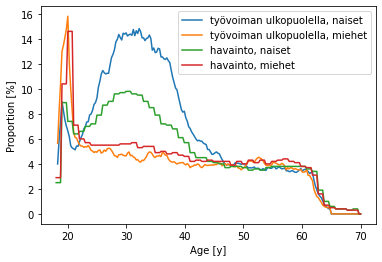

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.54 |      0.34 |       0.12 |      0.00 |        0.00 |
| 30-39 |     0.48 |      0.37 |       0.15 |      0.00 |        0.00 |
| 40-49 |     0.47 |      0.39 |       0.14 |      0.00 |        0.00 |
| 50-59 |     0.43 |      0.38 |       0.19 |      0.00 |        0.00 |
| 60-65 |     0.17 |      0.16 |       0.16 |      0.14 |        0.37 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.78 |     

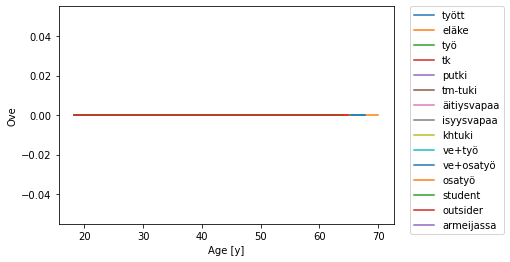

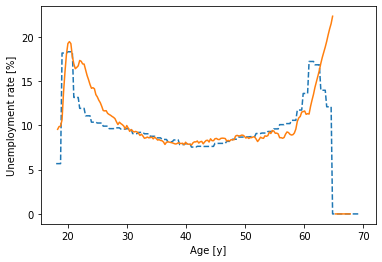

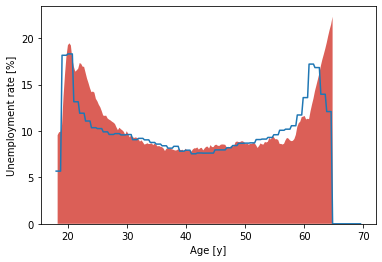

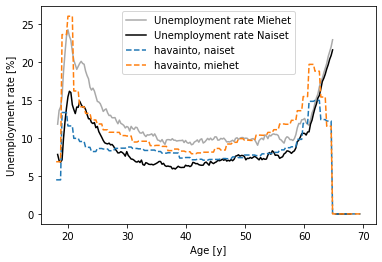

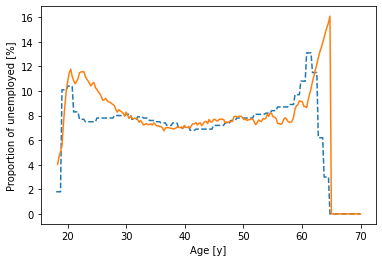

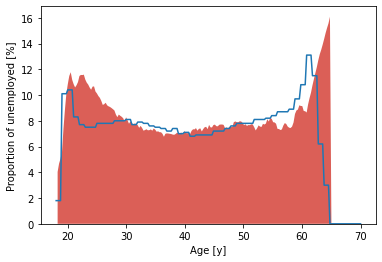

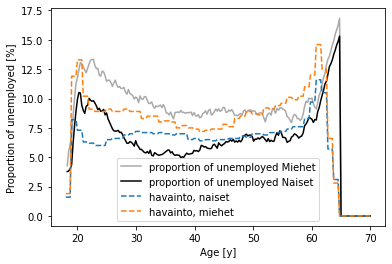

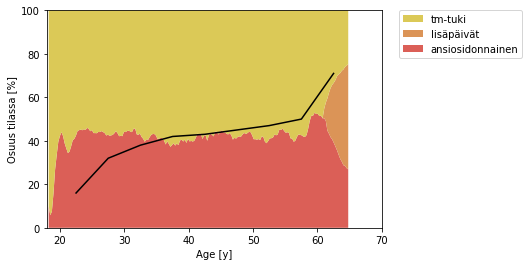

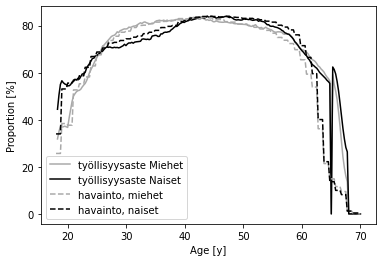

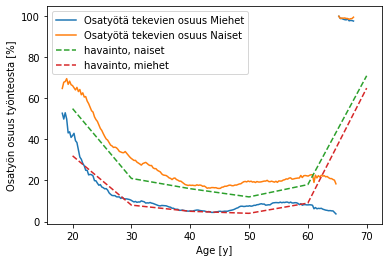

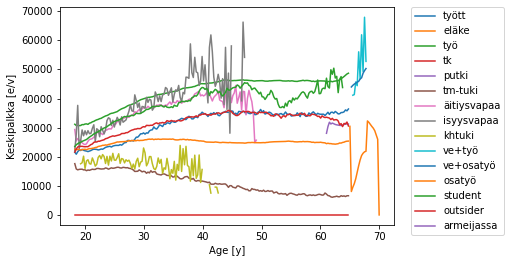

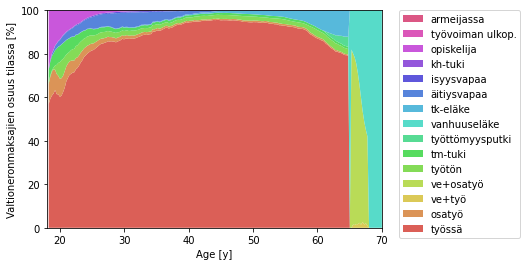

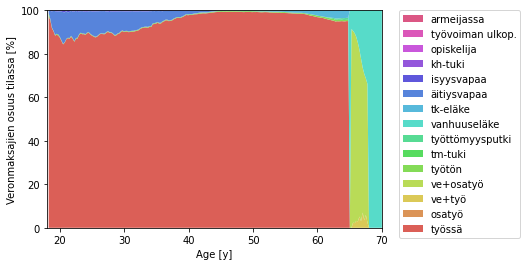

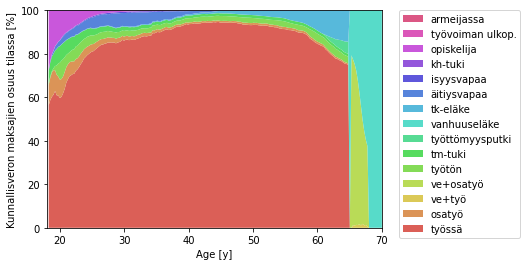

Valtionveron maksajien osuus
Etuudella olevat 6.81
Työssä 82.64
Eläkkeellä 15.29

Kunnallisveron maksajien osuus
Etuudella olevat 8.48
Työssä 68.22
Eläkkeellä 26.30

Veronmaksajien osuus
Etuudella olevat 8.20
Työssä 70.63
Eläkkeellä 24.45



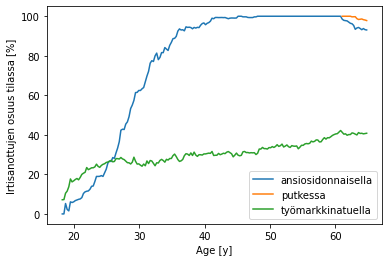

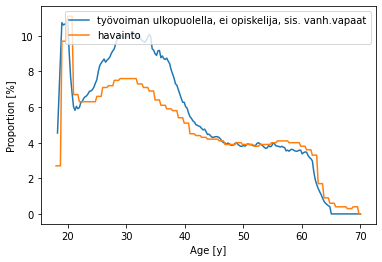

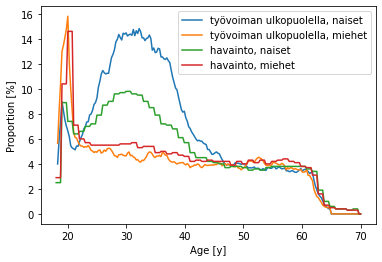

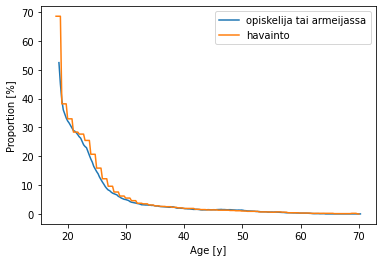

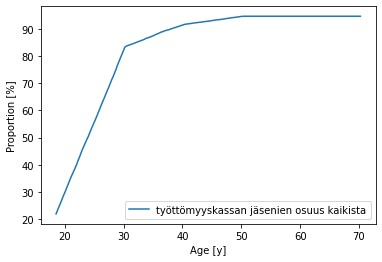

Kassanjäseniä min 21.85 % max 94.71 %


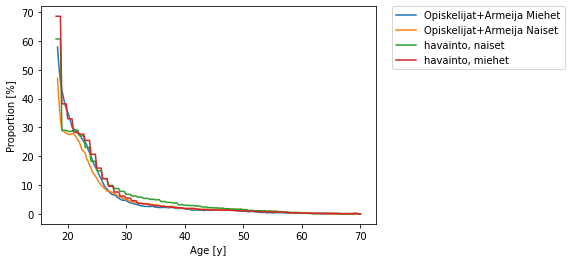

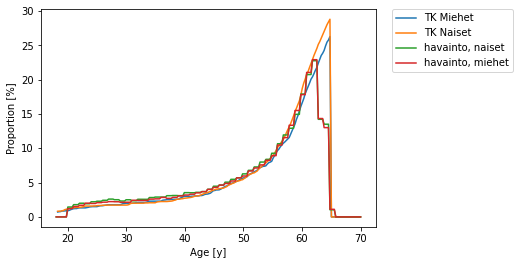

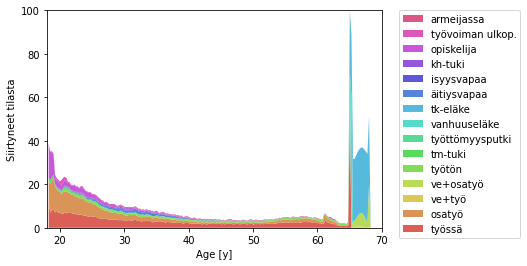

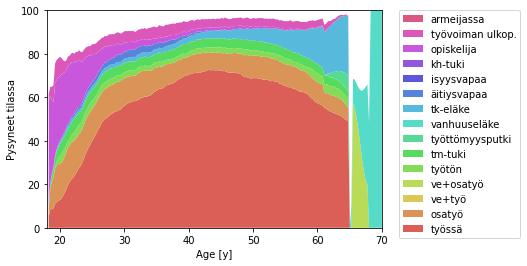

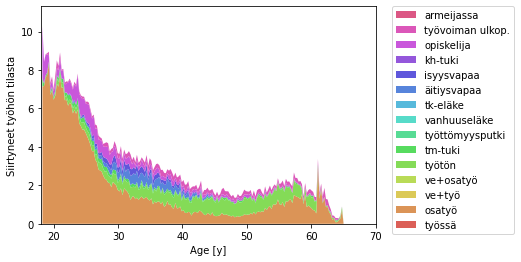

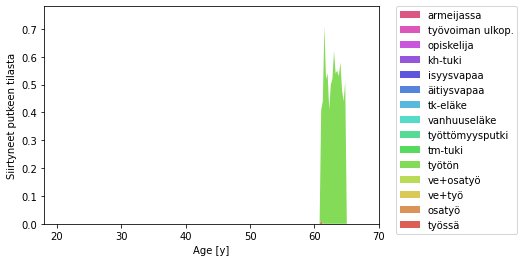

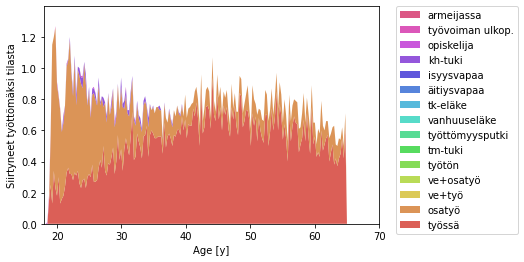

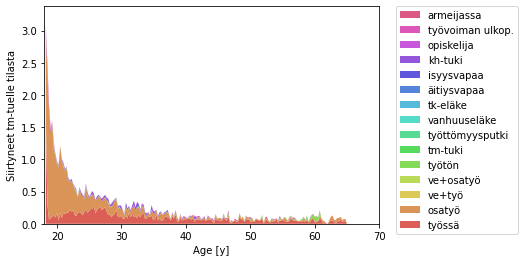

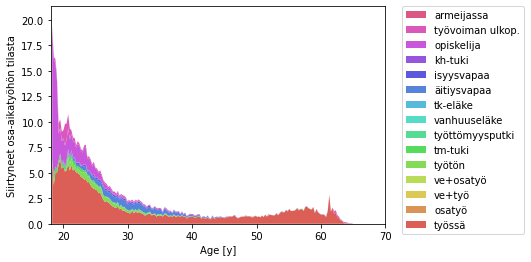

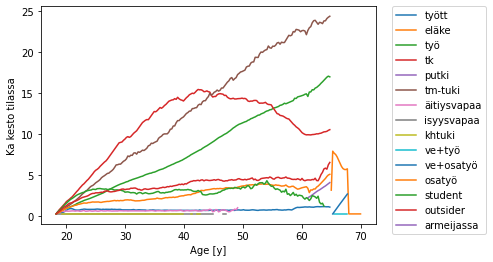

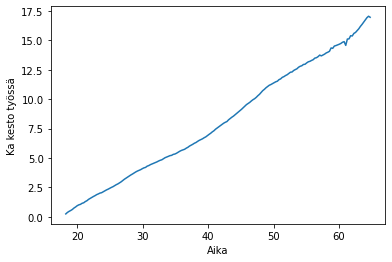

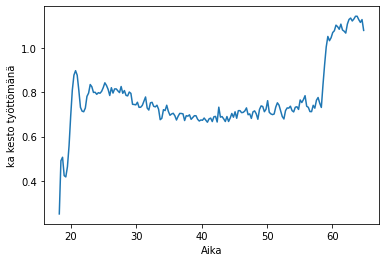

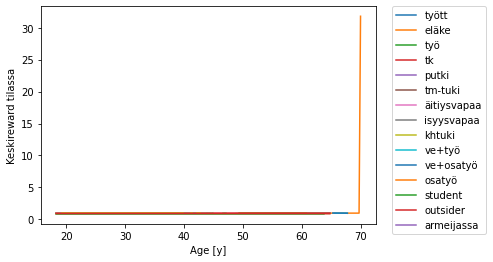

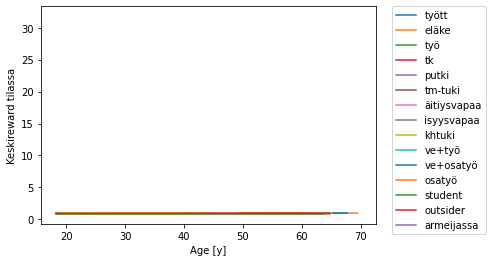

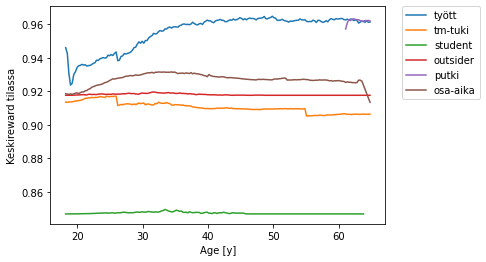

No handles with labels found to put in legend.


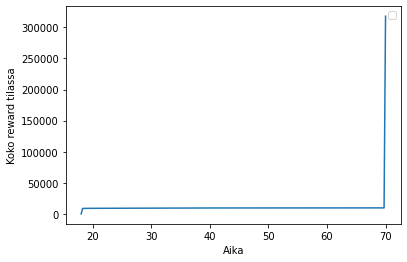

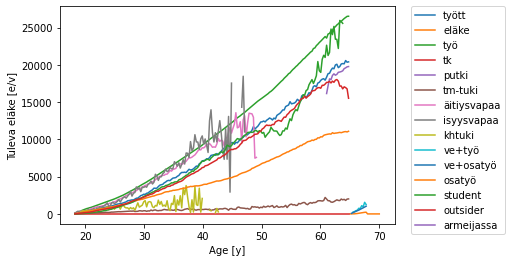

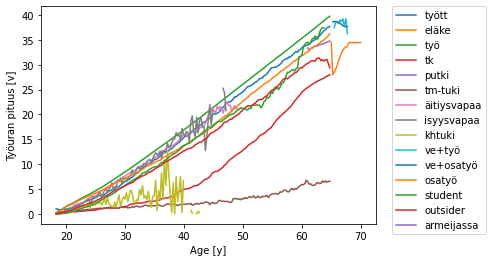

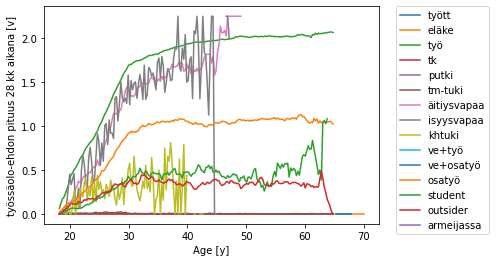

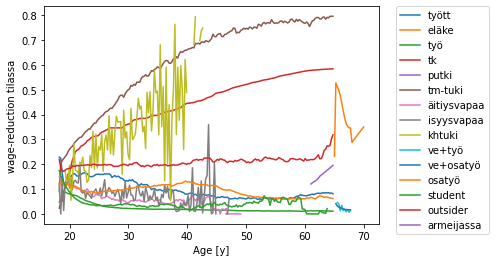

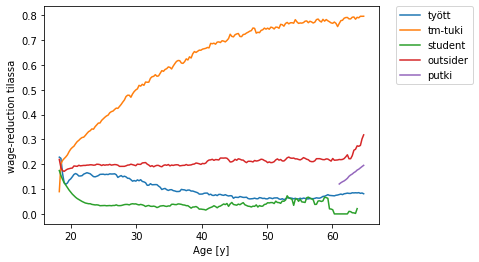

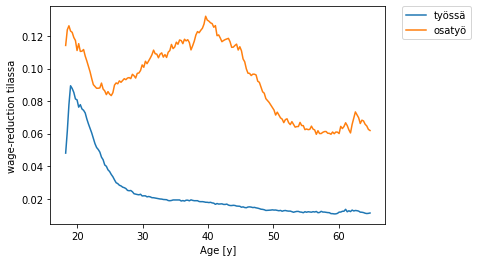

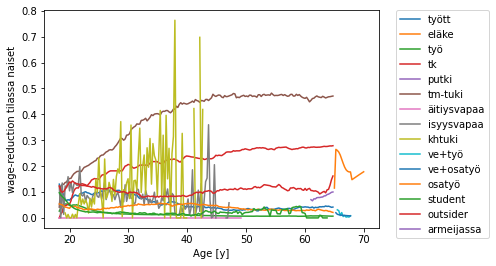

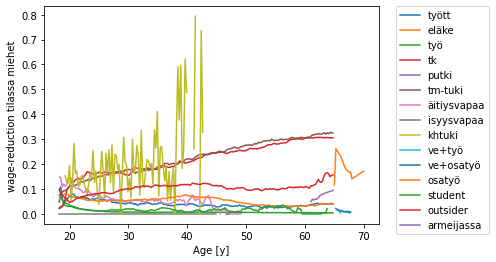

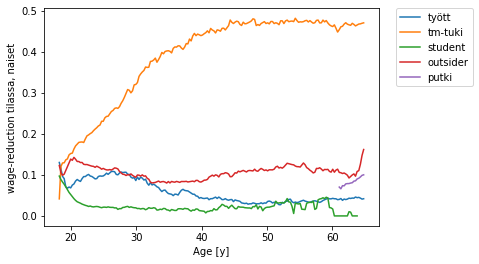

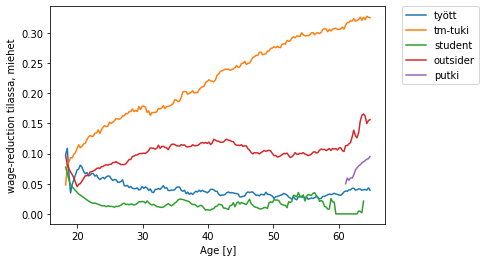

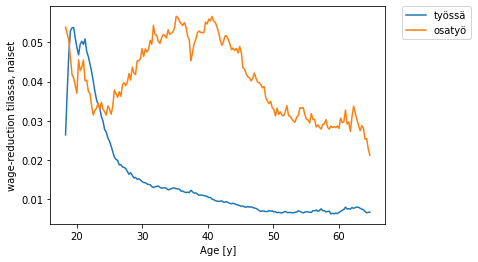

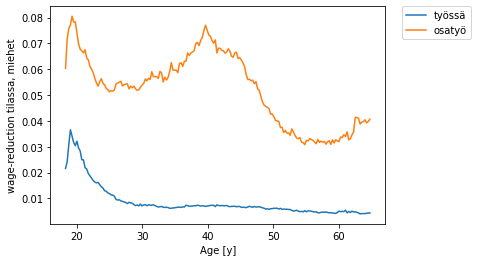

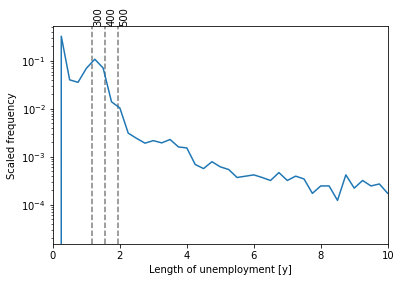

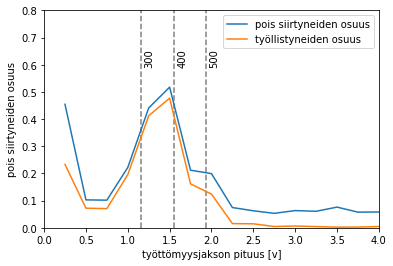

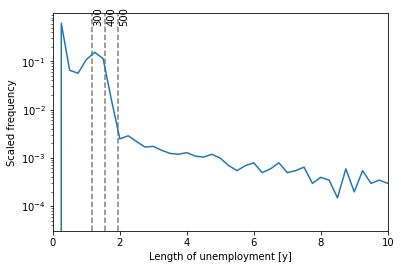

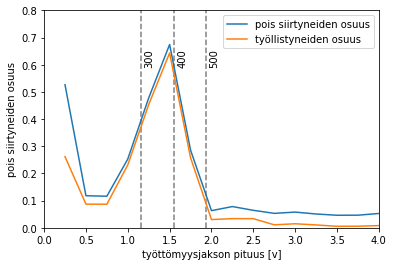

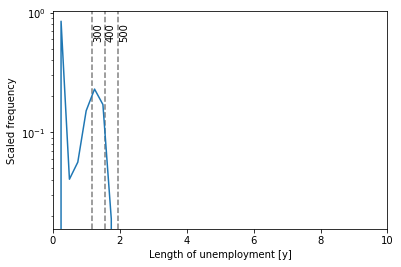

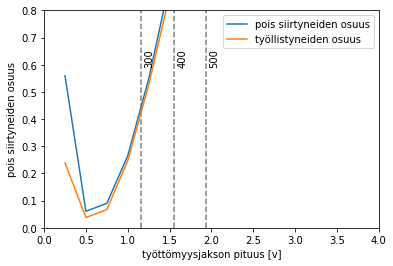

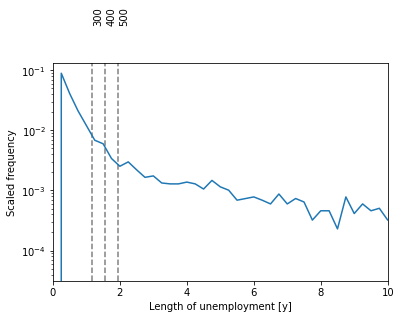

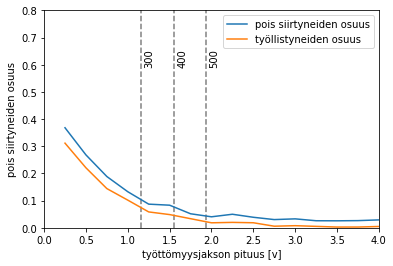

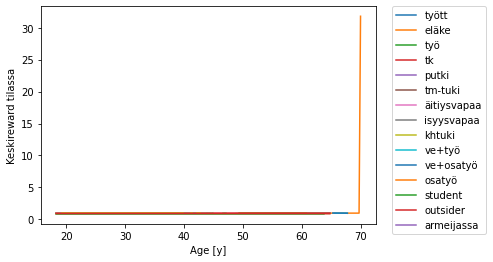

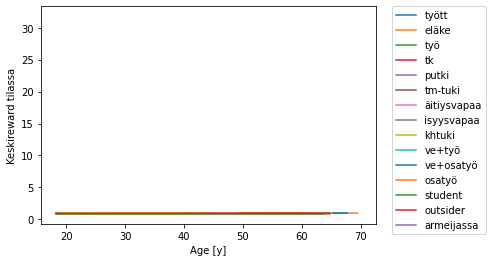

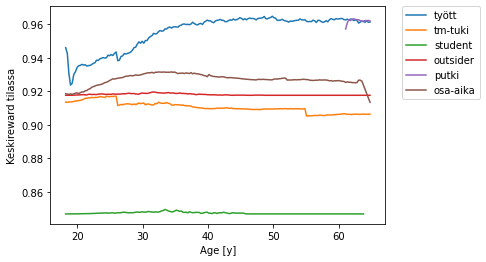

No handles with labels found to put in legend.


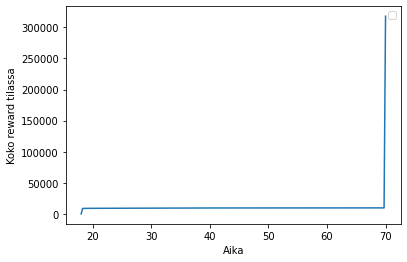

In [10]:
ret_LC.render(load=retirement_results)

Finally, we compare employment rates between the two models.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Rahavirrat skaalattuna väestötasolle
+-----------------------+-----------------------+----------------------+----------------------+
|                       |         retirement 65 |      retirement 63.5 |                  ero |
|-----------------------+-----------------------+----------------------+----------------------|
| tyotulosumma          |  92,698,781,694.83    | 90,414,005,554.47    |  2,284,776,140.36    |
| etuusmeno             |  42,501,434,892.63    | 43,245,145,912.19    |   -743,711,019.55    |
| verot+maksut          |  34,740,236,251.58    | 34,293,834,511.50    |    446,401,740.08    |
| muut tulot            |   7,761,198,641.06    |  8,951,311,400.69    | -1,190,112,759.63    |
| valtionvero           |   4,079,595,055.12    |  4,065,455,200.62    |     14,139,854.50    |
| kunnallisvero         |  20,356,263,792.71    | 20,133,333,656.76    |    222,930,135.94    |
| ptel                  |   6,255,505,076.58    |  6,113,504,927.58    |    142,000,149.00    |
| t

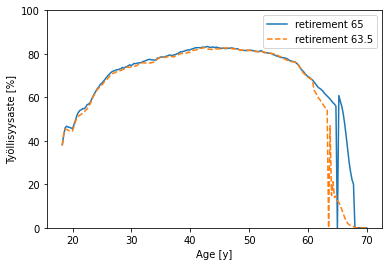

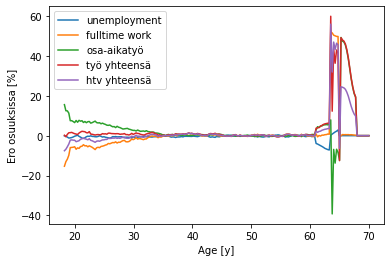

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


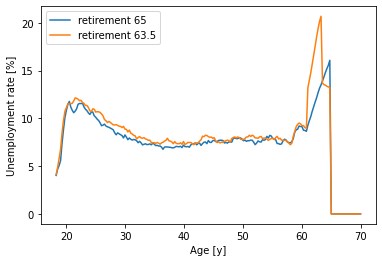

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


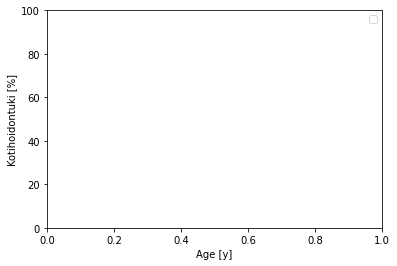

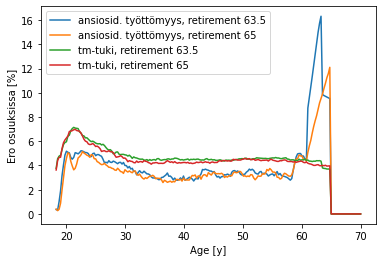

Työllisyysvaikutus 21-60-vuotiaisiin noin -6156 htv ja 14639 työllistä
- kokoaikaisiin 21-60-vuotiailla noin -26951 työllistä (1732883 vs 1759834)
- osa-aikaisiin 21-60-vuotiailla noin 41591 työllistä (357451 vs 315860)
Työllisiä 1911608 vs 1917764 htv
Työllisyysastevaikutus 21-60-vuotiailla noin 0.54 prosenttia (76.57 vs 76.03)
- kokoaikaisiin 21-60-vuotiailla noin -0.99 prosenttia (63.48 vs 64.46)
- osa-aikaisiin 21-60-vuotiailla noin 1.52 prosenttia (13.09 vs 11.57)
Työttömyysvaikutus 21-60-vuotiaisiin noin -20384 htv
- ansiosidonnaiseen 21-60-vuotiailla noin -12354 htv (114533 vs 126887)
- tm-tukeen 21-60-vuotiailla noin -5859 työllistä (150238 vs 156097)
- putkeen 21-60-vuotiailla noin -2171 työllistä (12232 vs 14403)
epävarmuus työllisyysasteissa 0.0196, hajonta 0.0726


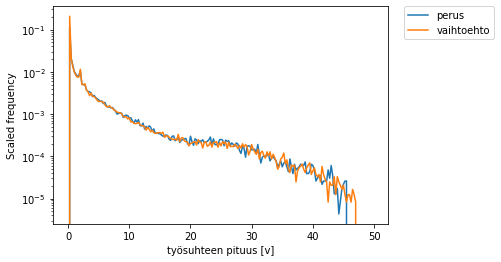

Jakauma ansiosidonnainen+tmtuki+putki, no max age
retirement 65 keskikesto 1.3930133259873971 v retirement 63.5 keskikesto 1.435734175495789 v
Skaalaamaton retirement 65 lkm 29041 v retirement 63.5 lkm 29448 v
Skaalaamaton retirement 65 työtpäiviä yht 40454.5 v retirement 63.5 työtpäiviä yht 42279.5 v


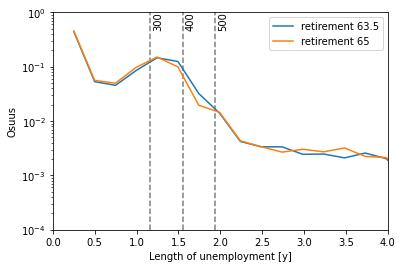

retirement 65 keskikesto 1.3930133259873971 v retirement 63.5 keskikesto 1.435734175495789 v
Skaalaamaton retirement 65 lkm 29041 v retirement 63.5 lkm 29448 v
Skaalaamaton retirement 65 työtpäiviä yht 40454.5 v retirement 63.5 työtpäiviä yht 42279.5 v


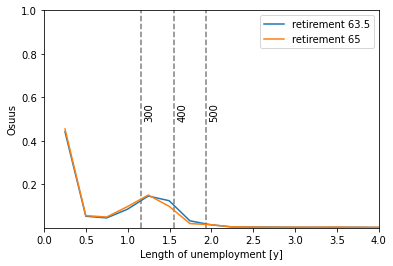

retirement 65 keskikesto 1.3930133259873971 v retirement 63.5 keskikesto 1.435734175495789 v
Skaalaamaton retirement 65 lkm 29041 v retirement 63.5 lkm 29448 v
Skaalaamaton retirement 65 työtpäiviä yht 40454.5 v retirement 63.5 työtpäiviä yht 42279.5 v


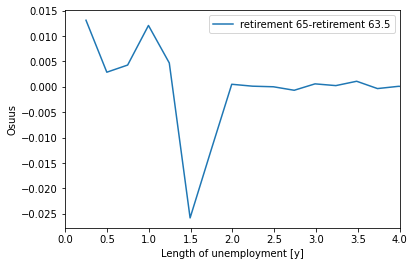

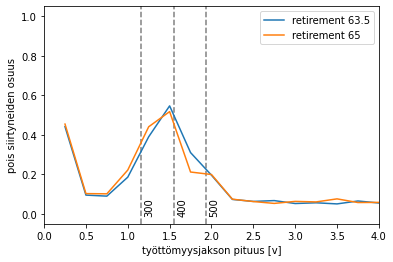

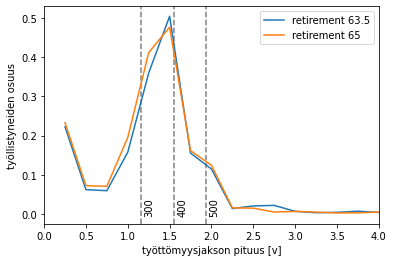

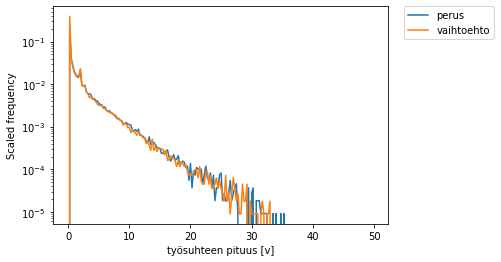

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
retirement 65 keskikesto 0.8930473787496496 v retirement 63.5 keskikesto 0.9329416450906194 v
Skaalaamaton retirement 65 lkm 24969 v retirement 63.5 lkm 25105 v
Skaalaamaton retirement 65 työtpäiviä yht 22298.5 v retirement 63.5 työtpäiviä yht 23421.5 v


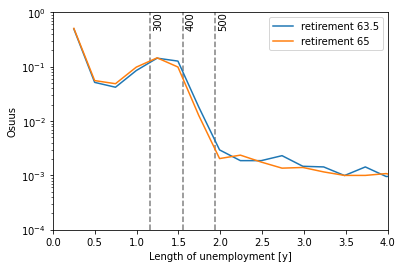

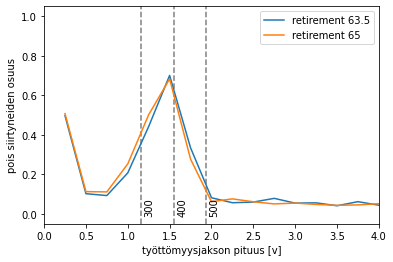

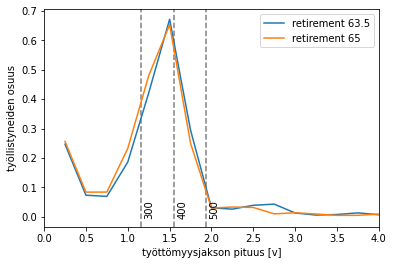

retirement 63.5
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.54 |      0.34 |       0.12 |      0.00 |        0.00 |
| 30-39 |     0.48 |      0.37 |       0.15 |      0.00 |        0.00 |
| 40-49 |     0.47 |      0.39 |       0.14 |      0.00 |        0.00 |
| 50-59 |     0.43 |      0.38 |       0.19 |      0.00 |        0.00 |
| 60-65 |     0.17 |      0.16 |       0.16 |      0.14 |        0.37 |
+-------+----------+-----------+------------+-----------+-------------+
retirement 65
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.52 |      0.33 |       0.14 |      0.00 |        0.00 |
| 30-39 |     0.45 |      0.37 |  

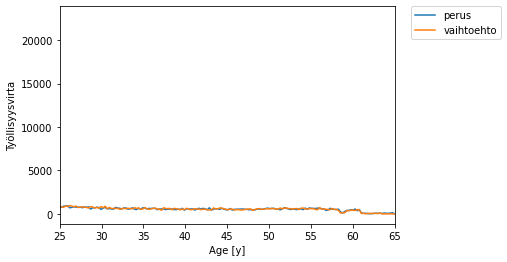

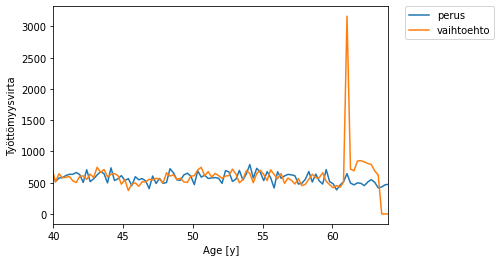

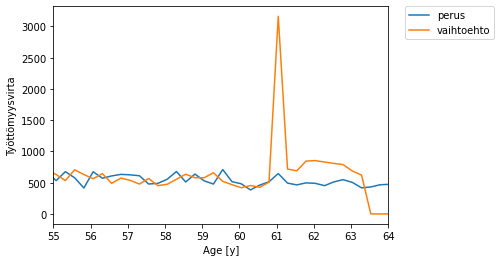

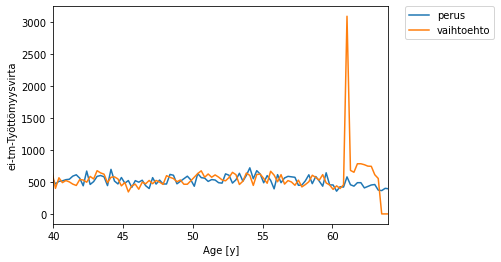

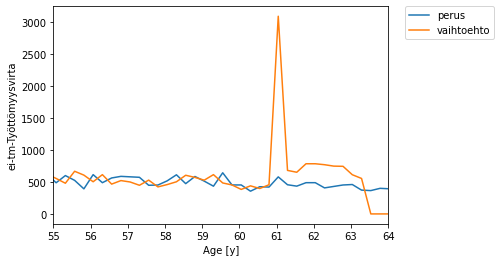

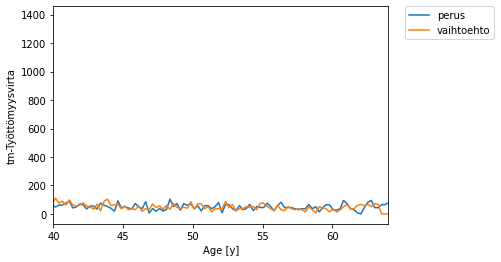

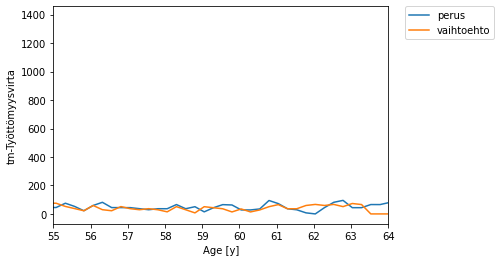

In [11]:
ret_LC.compare_with(baseline_LCmodel,label1='retirement 65',label2='retirement 63.5',figname='retage')

The increase in unemployment rate shifts to higher age when the retirement age is increased. 